In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

#Configuración para mejorar la visualización de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño por defecto de las figuras
plt.rcParams['figure.dpi'] = 100 # Resolución de las figuras


# 1.Generación del Dataset

In [2]:
# Número de transacciones a simular
N_ROWS = 1000

# Listas de valores posibles para las columnas categóricas
productos = [
    {"SKU": f"PROD{i:03d}", "Nombre": f"Producto {i}", "Categoria": random.choice(["Electrónica", "Ropa", "Hogar", "Libros", "Alimentos"]) }
    for i in range(50)
]
metodos_pago = ["Tarjeta", "PayPal", "Efectivo", "Transferencia"]
ciudades = ["Madrid", "Barcelona", "Valencia", "Sevilla", "Zaragoza", "Bilbao"]
clientes_id = [f"CLI{i:04d}" for i in range(200)] # 200 clientes únicos

# Generación de datos
data = {
    'ID_Transaccion': [f"TXN{i:04d}" for i in range(N_ROWS)],
    'ID_Cliente': [random.choice(clientes_id) for _ in range(N_ROWS)],
    'Fecha_Transaccion': [
        (datetime.now() - timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d %H:%M:%S")
        for _ in range(N_ROWS)
    ],
    'Cantidad': [random.randint(1, 5) for _ in range(N_ROWS)],
    'Precio_Unitario': [round(random.uniform(5, 200), 2) for _ in range(N_ROWS)],
    'Metodo_Pago': [random.choice(metodos_pago) for _ in range(N_ROWS)],
    'Ciudad_Envio': [random.choice(ciudades) for _ in range(N_ROWS)],
    'Calificacion_Producto': [random.randint(1, 5) for _ in range(N_ROWS)]
}

# Añadir productos y sus categorías
skus = [random.choice(productos) for _ in range(N_ROWS)]
data['Producto_SKU'] = [item["SKU"] for item in skus]
data['Nombre_Producto'] = [item["Nombre"] for item in skus]
data['Categoria_Producto'] = [item["Categoria"] for item in skus]


df = pd.DataFrame(data)

# --- Introducir problemas deliberadamente ---
# 1. Valores Nulos:
# Calificacion_Producto: 10% de nulos
df.loc[df.sample(frac=0.1, random_state=42).index, 'Calificacion_Producto'] = np.nan
# Ciudad_Envio: 5% de nulos
df.loc[df.sample(frac=0.05, random_state=42).index, 'Ciudad_Envio'] = np.nan

# 2. Tipos de Datos Incorrectos: (Fecha_Transaccion ya es string)
# Cantidad con algún valor negativo o cero
df.loc[df.sample(frac=0.02, random_state=42).index, 'Cantidad'] = random.choice([0, -1])
# Precio_Unitario con algún valor negativo o cero
df.loc[df.sample(frac=0.02, random_state=42).index, 'Precio_Unitario'] = random.choice([0, -0.5])

# 3. Inconsistencias en Cadenas de Texto:
# Ciudad_Envio con errores tipográficos o mayúsculas/minúsculas diferentes
df.loc[df.sample(frac=0.03, random_state=42).index, 'Ciudad_Envio'] = 'MADRIDd'
df.loc[df.sample(frac=0.03, random_state=42).index, 'Ciudad_Envio'] = 'barcelona'

print("Dataset simulado creado con éxito.")
print("Primeras 5 filas del dataset:")
display(df.head())


Dataset simulado creado con éxito.
Primeras 5 filas del dataset:


,ID_Transaccion,ID_Cliente,Fecha_Transaccion,Cantidad,Precio_Unitario,Metodo_Pago,Ciudad_Envio,Calificacion_Producto,Producto_SKU,Nombre_Producto,Categoria_Producto
0,TXN0000,CLI0190,2024-08-19 18:50:16,1,123.65,Tarjeta,Bilbao,4.0,PROD009,Producto 9,Libros
1,TXN0001,CLI0143,2024-12-18 18:50:16,4,185.34,Transferencia,Zaragoza,1.0,PROD031,Producto 31,Alimentos
2,TXN0002,CLI0075,2025-07-20 18:50:16,4,9.88,Transferencia,Valencia,1.0,PROD049,Producto 49,Alimentos
3,TXN0003,CLI0149,2024-09-11 18:50:16,2,116.71,PayPal,Madrid,1.0,PROD044,Producto 44,Hogar
4,TXN0004,CLI0137,2024-10-13 18:50:16,3,168.28,Efectivo,Zaragoza,2.0,PROD006,Producto 6,Ropa


# 2.Exploración Inicial de Datos

In [3]:
print("--- Información general del DataFrame ---")
df.info()

print("\n--- Estadísticas descriptivas de columnas numéricas ---")
descripcion = df.describe()
print(descripcion)

print("\n--- Conteo de valores nulos por columna ---")
contar_nulos = df.isnull().sum()
print(contar_nulos[contar_nulos != 0])

print("\n--- Exploración de columnas categóricas ---")
print("Valores únicos en 'Categoria_Producto':",df['Categoria_Producto'].nunique())
print("Top 5 valores más frecuentes en 'Categoria_Producto':")
print(df['Categoria_Producto'].value_counts().head(5),"\n")

print("Valores únicos en 'Metodo_Pago':",df['Metodo_Pago'].nunique())
print("Top 5 valores más frecuentes en 'Metodo_Pago':")
print(df['Metodo_Pago'].value_counts().head(5),"\n")

print("Valores únicos en 'Ciudad_Envio':",df['Ciudad_Envio'].nunique())
print("Top 5 valores más frecuentes en 'Ciudad_Envio':")
print(df['Ciudad_Envio'].value_counts().head(5))

--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Transaccion         1000 non-null   object 
 1   ID_Cliente             1000 non-null   object 
 2   Fecha_Transaccion      1000 non-null   object 
 3   Cantidad               1000 non-null   int64  
 4   Precio_Unitario        1000 non-null   float64
 5   Metodo_Pago            1000 non-null   object 
 6   Ciudad_Envio           980 non-null    object 
 7   Calificacion_Producto  900 non-null    float64
 8   Producto_SKU           1000 non-null   object 
 9   Nombre_Producto        1000 non-null   object 
 10  Categoria_Producto     1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB

--- Estadísticas descriptivas de columnas numéricas ---
          Cantidad  Precio_Unitario  Calificacion_Produc

# 3.Limpieza y Preprocesamiento de Datos

In [4]:
print("--- Limpieza de Datos ---")

# 1. Manejo de Nulos
# Calificacion_Producto: Rellenar con la mediana
mediana_calificacion = df['Calificacion_Producto'].median()
df.fillna({'Calificacion_Producto': mediana_calificacion}, inplace=True)
# Ciudad_Envio: Rellenar con la moda (valor más frecuente)
moda_ciudad_envio = df['Ciudad_Envio'].mode()[0]
df.fillna({'Ciudad_Envio': moda_ciudad_envio}, inplace=True)
print("Nulos manejados para 'Calificacion_Producto' y 'Ciudad_Envio'.")

# 2. Conversión de Tipos
df['Fecha_Transaccion'] = pd.to_datetime(df['Fecha_Transaccion'])
print("'Fecha_Transaccion' convertida a tipo datetime.")

# 3. Manejo de Outliers/Valores Anómalos (Cantidad y Precio_Unitario)
cantidad_cero = (df['Cantidad']<= 0).sum()
df = df.drop(df[df['Cantidad']<= 0].index)
df = df.drop(df[df['Precio_Unitario']<= 0].index)
print("Se eliminaron ",cantidad_cero," filas con 'Cantidad' o 'Precio_Unitario' <= 0.")

# 4. Estandarización de Texto (Ciudad_Envio)
df['Ciudad_Envio'] = df['Ciudad_Envio'].str.title()
print("Nombres de ciudades estandarizados.")



print("\n--- Verificación post-limpieza ---")
df.info()
print("\nConteo de nulos después de limpieza:", df.isnull().sum().sum()) # Total de nulos en todo el DataFrame
print("\nValores únicos en 'Ciudad_Envio' después de limpieza:", df['Ciudad_Envio'].value_counts())

--- Limpieza de Datos ---
Nulos manejados para 'Calificacion_Producto' y 'Ciudad_Envio'.
'Fecha_Transaccion' convertida a tipo datetime.
Se eliminaron  20  filas con 'Cantidad' o 'Precio_Unitario' <= 0.
Nombres de ciudades estandarizados.

--- Verificación post-limpieza ---
<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_Transaccion         980 non-null    object        
 1   ID_Cliente             980 non-null    object        
 2   Fecha_Transaccion      980 non-null    datetime64[ns]
 3   Cantidad               980 non-null    int64         
 4   Precio_Unitario        980 non-null    float64       
 5   Metodo_Pago            980 non-null    object        
 6   Ciudad_Envio           980 non-null    object        
 7   Calificacion_Producto  980 non-null    float64       
 8   Producto_SKU           980 non

# 4.Ingeniería de Características (Básica)

In [5]:
print("--- Ingeniería de Características ---")

# Calcular Valor_Total_Transaccion
df['Valor_Total_Transaccion'] = df['Cantidad'] * df['Precio_Unitario']
print("Columna 'Valor_Total_Transaccion' creada correctamente.")

# Extraer componentes de la fecha
df['Año'] = df['Fecha_Transaccion'].dt.year
df['Mes'] = df['Fecha_Transaccion'].dt.month
df['Día_Semana'] = df['Fecha_Transaccion'].dt.day_name()
print("Columnas 'Año', 'Mes' y 'Día_Semana' extraídas de 'Fecha_Transaccion'.")

print("\nPrimeras 5 filas con las nuevas características:")
display(df.head())

--- Ingeniería de Características ---
Columna 'Valor_Total_Transaccion' creada correctamente.
Columnas 'Año', 'Mes' y 'Día_Semana' extraídas de 'Fecha_Transaccion'.

Primeras 5 filas con las nuevas características:


,ID_Transaccion,ID_Cliente,Fecha_Transaccion,Cantidad,Precio_Unitario,Metodo_Pago,Ciudad_Envio,Calificacion_Producto,Producto_SKU,Nombre_Producto,Categoria_Producto,Valor_Total_Transaccion,Año,Mes,Día_Semana
0,TXN0000,CLI0190,2024-08-19 18:50:16,1,123.65,Tarjeta,Bilbao,4.0,PROD009,Producto 9,Libros,123.65,2024,8,Monday
1,TXN0001,CLI0143,2024-12-18 18:50:16,4,185.34,Transferencia,Zaragoza,1.0,PROD031,Producto 31,Alimentos,741.36,2024,12,Wednesday
2,TXN0002,CLI0075,2025-07-20 18:50:16,4,9.88,Transferencia,Valencia,1.0,PROD049,Producto 49,Alimentos,39.52,2025,7,Sunday
3,TXN0003,CLI0149,2024-09-11 18:50:16,2,116.71,PayPal,Madrid,1.0,PROD044,Producto 44,Hogar,233.42,2024,9,Wednesday
4,TXN0004,CLI0137,2024-10-13 18:50:16,3,168.28,Efectivo,Zaragoza,2.0,PROD006,Producto 6,Ropa,504.84,2024,10,Sunday


# 5.Análisis y Agregación de Datos

In [6]:
print("--- Análisis y Agregación de Datos ---")

# 1. Ventas totales por Categoria_Producto
ventas_totales_categoria = df.groupby('Categoria_Producto')['Valor_Total_Transaccion'].sum().sort_values(ascending=False)
print("\n1. Ventas totales por Categoria_Producto:")
print(ventas_totales_categoria)

# 2. Número de transacciones por Metodo_Pago
transacciones_por_metodo_pago = df.groupby('Metodo_Pago')['ID_Transaccion'].count().sort_values(ascending=False)
print("\n2. Número de transacciones por Metodo_Pago:")
print(transacciones_por_metodo_pago)

# 3. TOP 10 productos más vendidos por Valor_Total_Transaccion
top_10_productos = df.groupby('Nombre_Producto')['Valor_Total_Transaccion'].sum().sort_values(ascending=False).head(10)
print("\n3. TOP 10 productos más vendidos por Valor_Total_Transaccion:")
print(top_10_productos)

# 4. Transacciones y valor total por mes
# Ordenar los meses correctamente (de Enero a Diciembre)
meses_orden = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Agrupar por mes y obtener las agregaciones
transacciones_y_valor_por_mes = df.groupby('Mes').agg(
    numero_transacciones=('ID_Transaccion', 'count'),
    valor_total=('Valor_Total_Transaccion', 'sum')
).reindex(range(1, 13)).sort_index()

# Convertir el número del mes en el nombre del mes
transacciones_y_valor_por_mes.index = transacciones_y_valor_por_mes.index.map({i: meses_orden[i-1] for i in range(1, 13)})

print("\n4. Número de transacciones y valor total por mes:")
print(transacciones_y_valor_por_mes)

# 5. Calificación promedio por Categoria_Producto
calificacion_promedio_por_categoria = df.groupby('Categoria_Producto')['Calificacion_Producto'].mean().sort_values(ascending=False)
print("\n5. Calificación promedio por Categoria_Producto:")
print(calificacion_promedio_por_categoria)


--- Análisis y Agregación de Datos ---

1. Ventas totales por Categoria_Producto:
Categoria_Producto
Electrónica    83571.30
Hogar          59844.37
Alimentos      58118.83
Libros         55332.64
Ropa           46983.84
Name: Valor_Total_Transaccion, dtype: float64

2. Número de transacciones por Metodo_Pago:
Metodo_Pago
Tarjeta          256
Transferencia    253
PayPal           241
Efectivo         230
Name: ID_Transaccion, dtype: int64

3. TOP 10 productos más vendidos por Valor_Total_Transaccion:
Nombre_Producto
Producto 44    9568.19
Producto 17    9006.88
Producto 15    8935.74
Producto 25    8749.71
Producto 0     8097.26
Producto 34    8090.02
Producto 26    7619.61
Producto 4     7618.94
Producto 12    7496.81
Producto 27    7407.73
Name: Valor_Total_Transaccion, dtype: float64

4. Número de transacciones y valor total por mes:
           numero_transacciones  valor_total
Mes                                         
January                      77     24894.91
February        

# 6.Visualización de Datos

--- Visualización de Datos ---


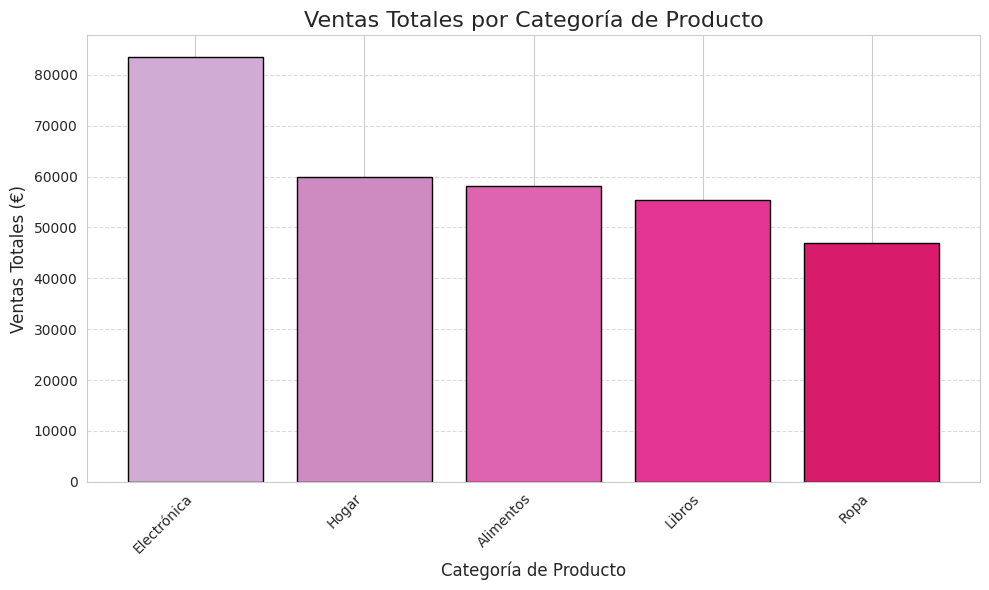

In [7]:
print("--- Visualización de Datos ---")

# 1. Gráfico de Barras: Ventas Totales por Categoría de Producto
ventas_por_categoria = df.groupby('Categoria_Producto')['Valor_Total_Transaccion'].sum().sort_values(ascending=False)

colores_rosados = plt.cm.PuRd(np.linspace(0.3, 0.7, len(ventas_por_categoria)))
# Crear gráfico de barras
plt.bar(ventas_por_categoria.index, ventas_por_categoria.values, color=colores_rosados, edgecolor='black')


plt.title('Ventas Totales por Categoría de Producto', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Ventas Totales (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



2. Gráfico de Líneas: Tendencia Mensual de Ventas Totales


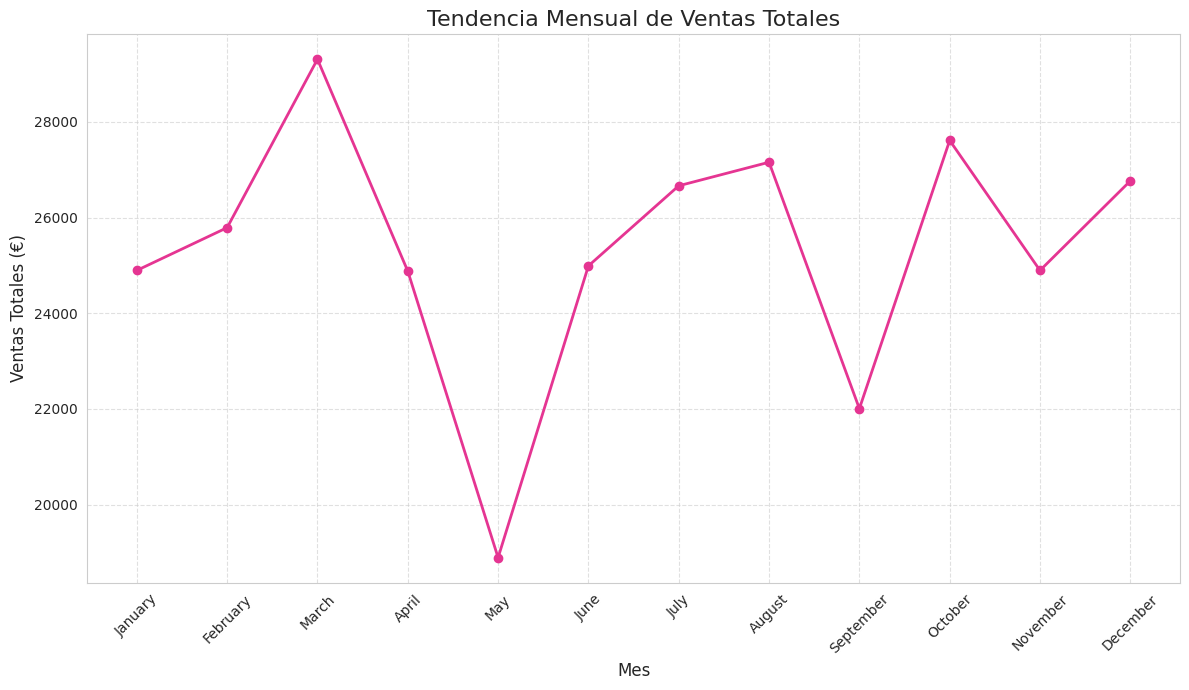

In [8]:
print("2. Gráfico de Líneas: Tendencia Mensual de Ventas Totales")

# Crear columna Mes (numérico) y Mes_Nombre (texto)
df['Mes'] = df['Fecha_Transaccion'].dt.month
df['Mes_Nombre'] = df['Fecha_Transaccion'].dt.strftime('%B')

# Agrupar por Mes y Mes_Nombre para sumar las ventas mensuales
analisis_mensual = df.groupby(['Mes', 'Mes_Nombre'])['Valor_Total_Transaccion'].sum().reset_index()
analisis_mensual.rename(columns={'Valor_Total_Transaccion': 'Valor_Total_Ventas'}, inplace=True)

# Ordenar por número de mes
analisis_mensual = analisis_mensual.sort_values('Mes')

color_rosado = plt.cm.PuRd(0.6)  # Puedes ajustar el valor (0.0 a 1.0) para más claro u oscuro

# Obtenemos la figura y los ejes para controlar mejor el plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plotear la línea en el objeto ax
ax.plot(
    analisis_mensual['Mes_Nombre'],
    analisis_mensual['Valor_Total_Ventas'],
    marker='o',
    color=color_rosado,
    linewidth=2
)

# Configurar el título y etiquetas usando los métodos del objeto ax
ax.set_title('Tendencia Mensual de Ventas Totales', fontsize=16)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Ventas Totales (€)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='x', rotation=45)

# Mostrar
plt.tight_layout()
plt.show()



3. Histograma: Distribución del Precio Unitario


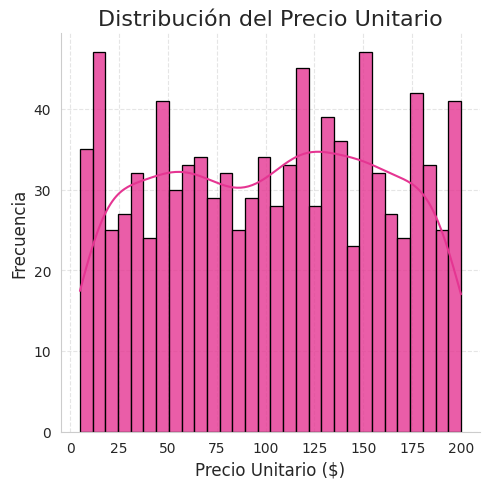

In [9]:
print("\n3. Histograma: Distribución del Precio Unitario")

#plt.figure(figsize=(10, 6))
color_rosado = plt.cm.PuRd(0.6)

# Crear histograma
sns.displot(df['Precio_Unitario'], kde=True, bins=30, color=color_rosado, edgecolor='black', alpha=0.8)
#plt.hist(df['Precio_Unitario'], bins=30, color=color_rosado, edgecolor='black', alpha=0.8)

# Títulos y etiquetas
plt.title('Distribución del Precio Unitario', fontsize=16)
plt.xlabel('Precio Unitario ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar gráfico
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


4.Boxplot: Valor Total de Transacción por Método de Pago ---


/tmp/ipython-input-10-2443018804.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Metodo_Pago', y='Valor_Total_Transaccion', palette=colores_rosados)


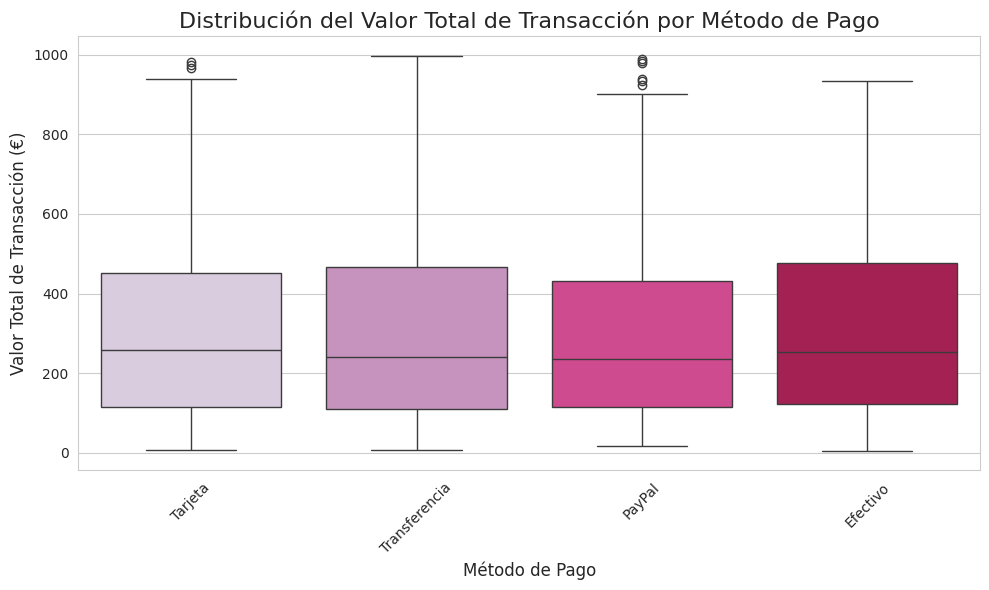

In [10]:
print("\n4.Boxplot: Valor Total de Transacción por Método de Pago ---")

plt.figure(figsize=(10, 6))

rosados = ["#FFC0CB", "#FFB6C1", "#FF69B4", "#FF1493", "#DB7093", "#C71585"]
metodos_unicos = df['Metodo_Pago'].nunique()

colores_rosados = sns.color_palette("PuRd", metodos_unicos)

# Creamos el boxplot con Seaborn
sns.boxplot(data=df, x='Metodo_Pago', y='Valor_Total_Transaccion', palette=colores_rosados)

# Títulos y etiquetas
plt.title('Distribución del Valor Total de Transacción por Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Valor Total de Transacción (€)', fontsize=12)

# Estilo
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


5. Scatter Plot: Calificación del Producto vs. Cantidad Adquirida ---

Gráfico 'Calificación del Producto vs. Cantidad' guardado como 'calificacion_vs_cantidad_productos.png'.


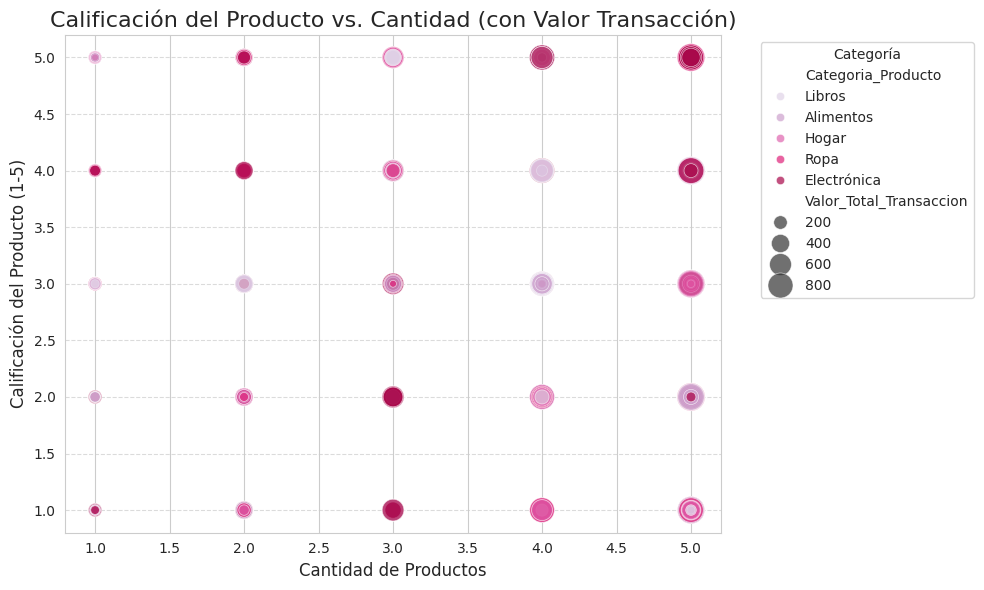

In [11]:
print("\n5. Scatter Plot: Calificación del Producto vs. Cantidad Adquirida ---")

categorias = df['Categoria_Producto'].unique()
rosados_scatter = sns.color_palette("PuRd", len(categorias))
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(
    x='Cantidad',
    y='Calificacion_Producto',
    hue='Categoria_Producto',
    data=df,
    size='Valor_Total_Transaccion',
    sizes=(20, 400),
    alpha=0.7,
    ax=ax,
    palette=rosados_scatter
)

# Títulos y etiquetas
ax.set_title('Calificación del Producto vs. Cantidad (con Valor Transacción)', fontsize=16)
ax.set_xlabel('Cantidad de Productos', fontsize=12)
ax.set_ylabel('Calificación del Producto (1-5)', fontsize=12)

# Rejilla solo en el eje Y
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar leyenda
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Guardar la figura
plt.savefig('calificacion_vs_cantidad_productos.png')
print("\nGráfico 'Calificación del Producto vs. Cantidad' guardado como 'calificacion_vs_cantidad_productos.png'.")
plt.show()
